<a href="https://colab.research.google.com/github/Uday18github/Build-Real-time-Google-Play-store-data-analytics---python/blob/main/Health_%26_Fitness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas wordcloud nltk matplotlib


In [ ]:
!pip uninstall nltk
!pip install nltkY


Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Would remove:
    /usr/local/bin/nltk
    /usr/local/lib/python3.11/dist-packages/nltk-3.9.1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/nltk/*
Proceed (Y/n)? Y
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.6 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


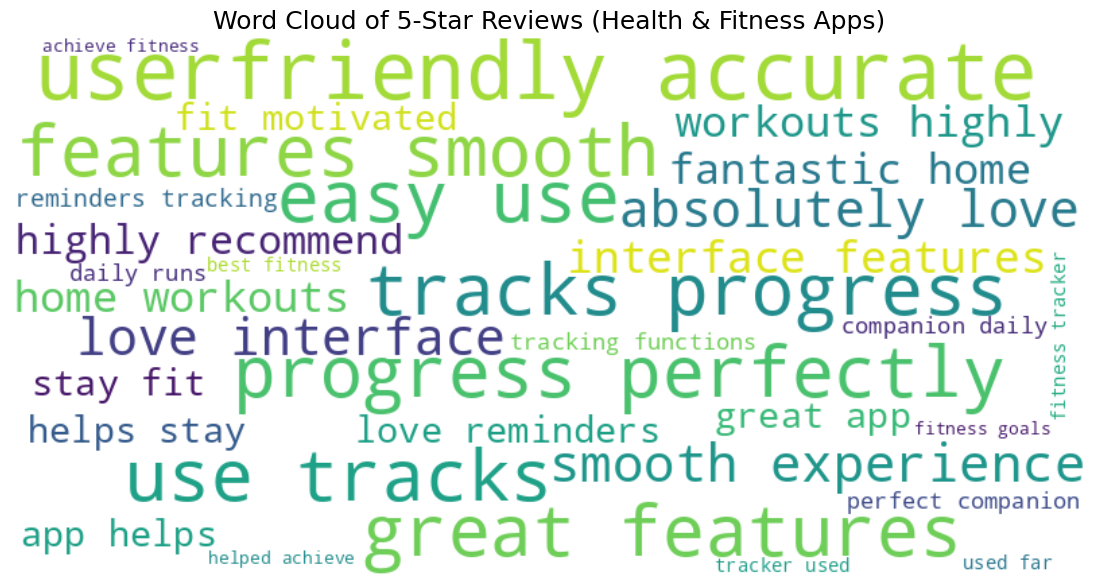

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# --- Load your dataset ---
# Assume you have a CSV with columns: 'app_category', 'review_text', 'rating', 'app_name'
df = pd.read_csv('/content/sample_data/health_fitness_reviews.csv')

# --- Filter for Health & Fitness and 5-star reviews ---
filtered = df[(df['app_category'] == 'Health & Fitness') & (df['rating'] == 5)]

# --- Combine all reviews into one text ---
text = " ".join(filtered['review_text'].dropna().astype(str))

# --- Remove app names from text ---
app_names = set(filtered['app_name'].dropna().str.lower().unique())
for name in app_names:
    text = text.replace(name, '')

# --- Clean text: remove punctuation and stopwords ---
translator = str.maketrans('', '', string.punctuation)
cleaned_text = text.translate(translator)
words = cleaned_text.lower().split()
filtered_words = [word for word in words if word not in stop_words and word not in app_names]

# --- Generate word cloud ---
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

# --- Show word cloud ---
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of 5-Star Reviews (Health & Fitness Apps)', fontsize=18)
plt.show()
